# Initial Setup

In [1]:
import pandas as pd
import os
import numpy as np
import datetime
from plotnine import *
import matplotlib.pyplot as plt

#pd.set_option("display.max_rows", 20)

In [2]:
filename = os.getcwd() + "/train.csv"
data = pd.read_csv(filename)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Extract deck feature, do some EDA

In [40]:
data['Deck'] = data['Cabin'].str[0]
#data.loc[data['Cabin'].isnull(), 'Deck'] = 'M'
data['Deck'] = data['Deck'].fillna('M')
data['Cabin_no'] = data['Cabin'].str.split('(\d+)', expand = True)[1].fillna(0).astype(int)

In [41]:
survival_deck = (
    data
    .groupby('Deck')
    .agg(n = ('SibSp', 'count'),
         pct_survived = ('Survived', 'mean'))
    .reset_index()
)

survival_deck

,Deck,n,pct_survived
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,M,687,0.299854
8,T,1,0.000000


In [42]:
#df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
data['Deck'] = data['Deck'].replace(['A', 'T'], 'A')
data['Deck'] = data['Deck'].replace(['F', 'G'], 'FG')
data['Deck'].value_counts()

M     687
C      59
B      47
D      33
E      32
FG     17
A      16
Name: Deck, dtype: int64

In [38]:
survival_cabno = (
    data[data['Cabin_no'] > 0]
    .assign(cabno_quantile = lambda x: pd.qcut(x['Cabin_no'], 10))
    .groupby('cabno_quantile')
    .agg(n = ('Ticket', 'count'),
         avg_survival = ('Survived', 'mean'))
    .reset_index()
)

survival_cabno

,cabno_quantile,n,avg_survival
0,"(1.999, 7.0]",21,0.666667
1,"(7.0, 19.8]",19,0.789474
2,"(19.8, 25.0]",21,0.714286
3,"(25.0, 33.0]",20,0.650000
4,"(33.0, 43.0]",19,0.736842
5,"(43.0, 51.0]",21,0.619048
6,"(51.0, 68.3]",19,0.631579
7,"(68.3, 85.2]",20,0.600000
8,"(85.2, 101.0]",21,0.714286
9,"(101.0, 148.0]",19,0.578947


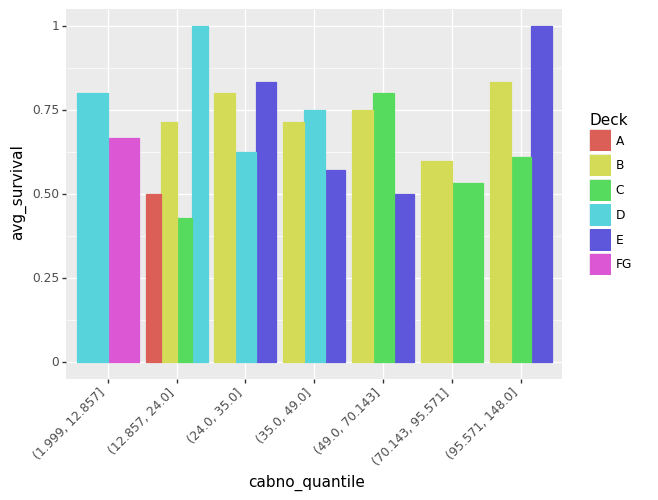

<ggplot: (8763956645301)>

In [55]:
survival_cabno_deck = (
    data[data['Cabin_no'] > 0]
    .assign(cabno_quantile = lambda x: pd.qcut(x['Cabin_no'], 7 ))
    .groupby(['cabno_quantile', 'Deck'])
    .agg(n = ('Ticket', 'count'),
         avg_survival = ('Survived', 'mean'))
    .reset_index()
)

(
    ggplot(survival_cabno_deck[survival_cabno_deck.n > 4])
    + aes(x = 'cabno_quantile', y = 'avg_survival', color = 'Deck', fill = 'Deck')
    + geom_bar(stat = 'identity', position = 'dodge')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)